In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 4]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

In [2]:
def get_iris_dataset():
    iris_data=load_iris()
    iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
    return iris_df

In [3]:
def optimise_k_means(data,max_k):
    means = []
    inertias = []

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #Generate the elbow plot
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    

In [4]:
iris_data = get_iris_dataset()

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [8]:
iris_data.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [9]:
iris_data.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [10]:
iris_data.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

<Axes: >

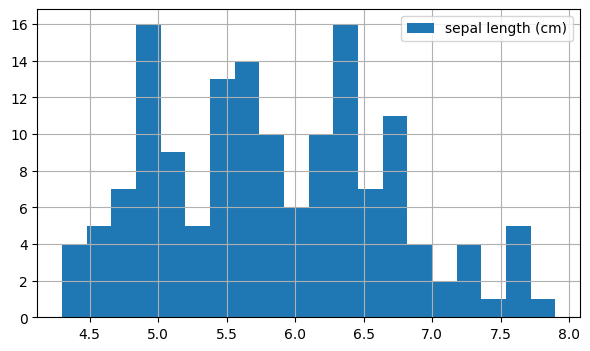

In [11]:
iris_data["sepal length (cm)"].hist(bins=20, legend=True)

<Axes: >

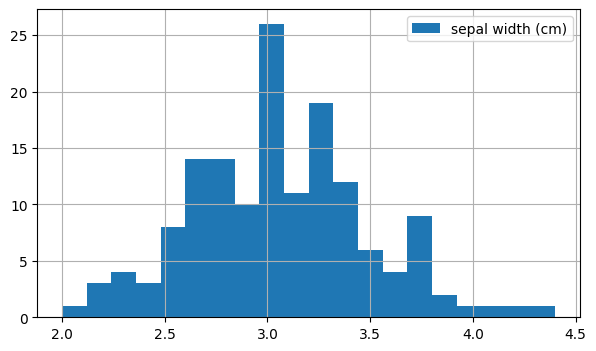

In [12]:
iris_data["sepal width (cm)"].hist(bins=20, legend=True)

<Axes: >

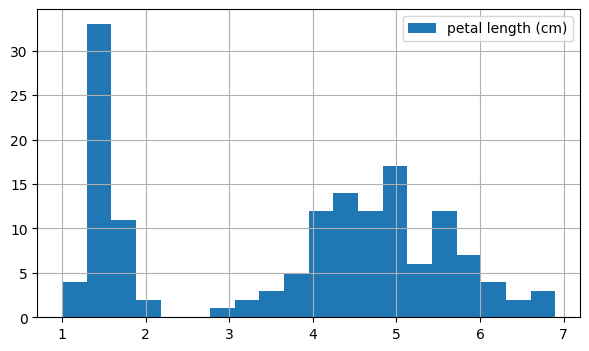

In [13]:
iris_data["petal length (cm)"].hist(bins=20, legend=True)

<Axes: >

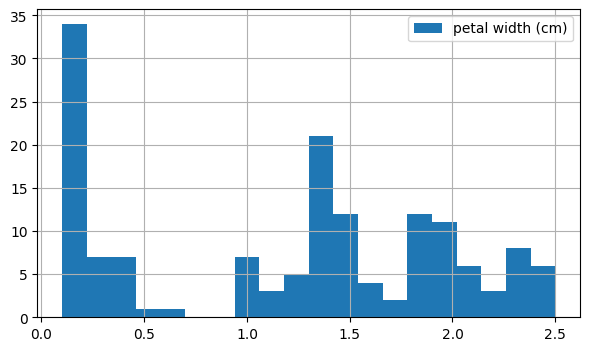

In [14]:
iris_data["petal width (cm)"].hist(bins=20, legend=True)

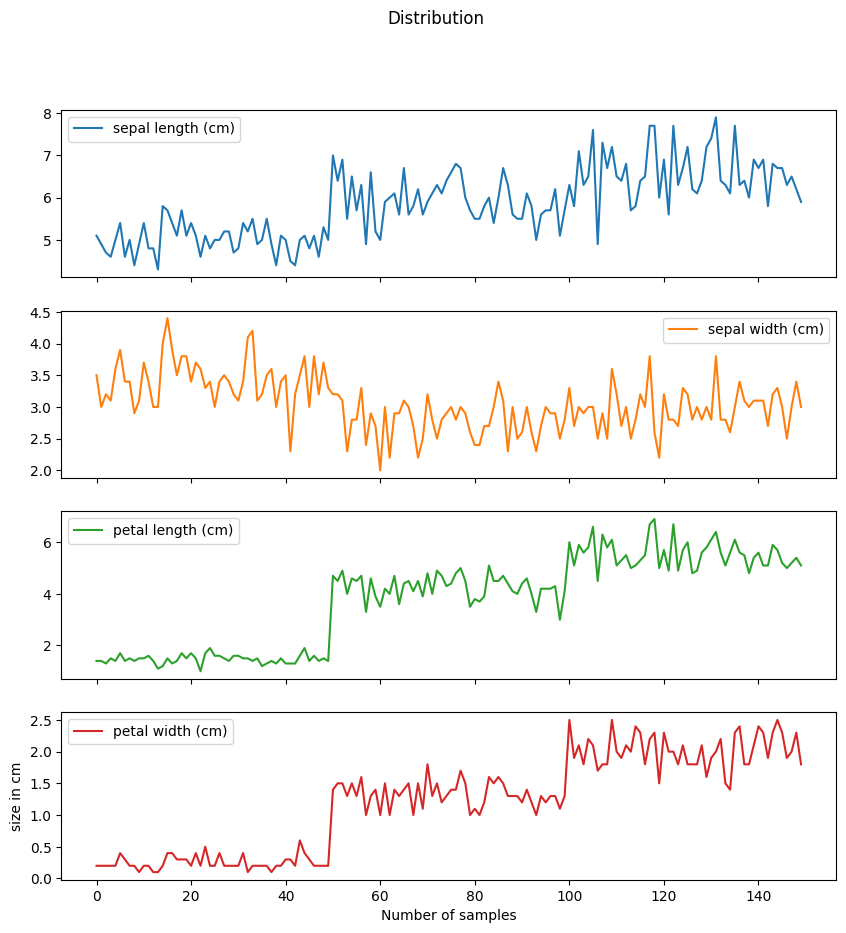

In [15]:
iris_data.plot(subplots = True, title="Distribution",figsize=(10, 10))

plt.xlabel('Number of samples')
plt.ylabel('size in cm')
plt.show()

/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The de

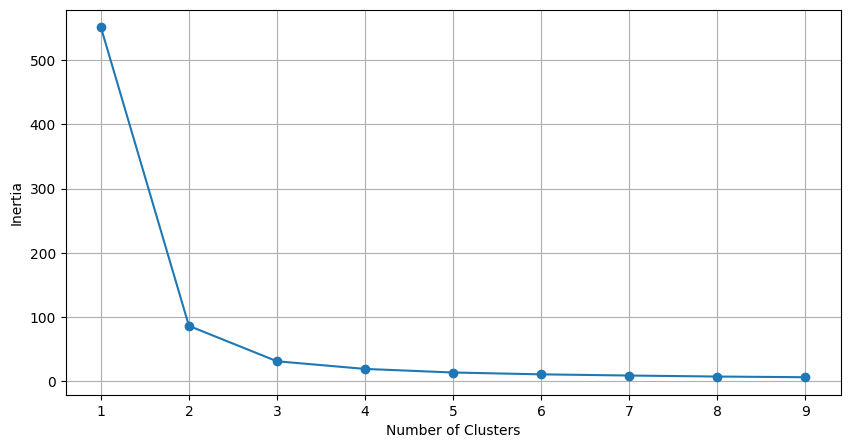

In [16]:
optimise_k_means(iris_data[['petal length (cm)','petal width (cm)']],10)

Antal kluster: 2, Antal datapunkter tillhörande kluster:[99 51]
Silhouette Score: 0.7653904101258123


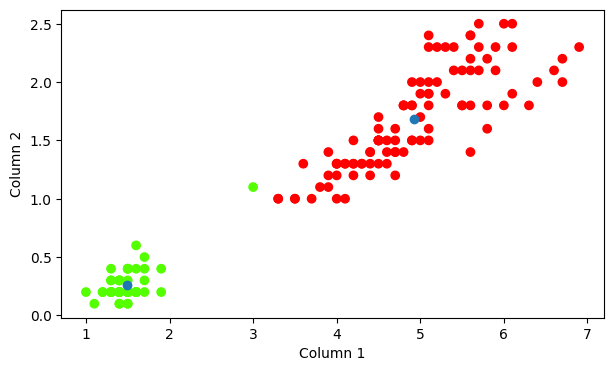

In [17]:

column1 = 'petal length (cm)'
column2 = 'petal width (cm)'
max_iter = 10
kmeans = KMeans(n_clusters=2, max_iter=max_iter,n_init=100)
kmeans.fit(iris_data[[column1,column2]].to_numpy())

labels = kmeans.predict(iris_data[[column1,column2]].to_numpy())

cluster_count = np.bincount(labels)

kmeans_center = kmeans.cluster_centers_
plt.scatter(iris_data[column1],iris_data[column2],c=labels, cmap='prism')
plt.scatter(kmeans_center[:,0],kmeans_center[:,1])
plt.xlabel("Column 1")
plt.ylabel("Column 2")


print(f"Antal kluster: {kmeans.n_clusters}, Antal datapunkter tillhörande kluster:{cluster_count}")

score = silhouette_score(iris_data[[column1,column2]], kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {score}")




----------------------------------
Sepal Length and Petal Width

/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The de

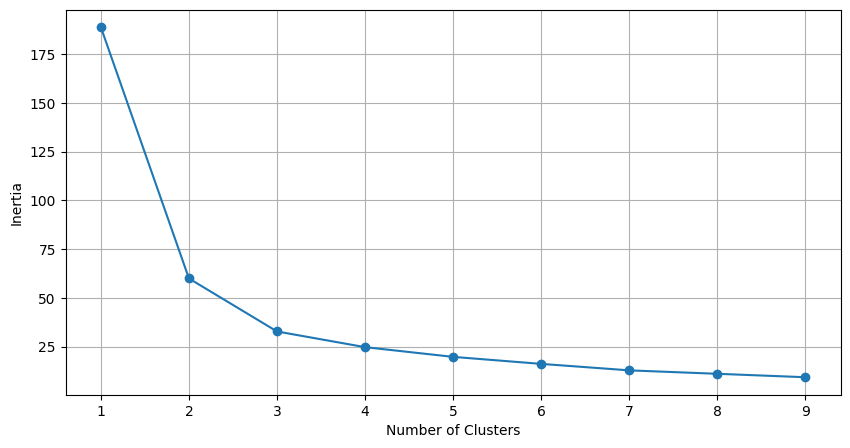

In [18]:
optimise_k_means(iris_data[['sepal length (cm)','petal width (cm)']],10)

Antal kluster: 2, Antal datapunkter tillhörande kluster:[86 64]
Sepal Length, Petal Width 
Silhouette Score: 0.5645716498947053


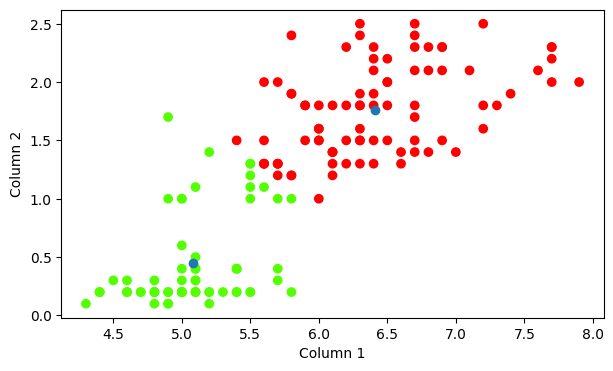

In [19]:
column1 = 'sepal length (cm)'
column2 = 'petal width (cm)'
max_iter = 10
kmeans = KMeans(n_clusters=2, max_iter=max_iter,n_init=100)
kmeans.fit(iris_data[[column1,column2]].to_numpy())

labels = kmeans.predict(iris_data[[column1,column2]].to_numpy())

cluster_count = np.bincount(labels)

kmeans_center = kmeans.cluster_centers_
plt.scatter(iris_data[column1],iris_data[column2],c=labels, cmap='prism')
plt.scatter(kmeans_center[:,0],kmeans_center[:,1])
plt.xlabel("Column 1")
plt.ylabel("Column 2")

print(f"Antal kluster: {kmeans.n_clusters}, Antal datapunkter tillhörande kluster:{cluster_count}")


print("Sepal Length, Petal Width ")

score = silhouette_score(iris_data[[column1,column2]], kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {score}")

----------------------------------
Sepal Length and Sepal Width

/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The de

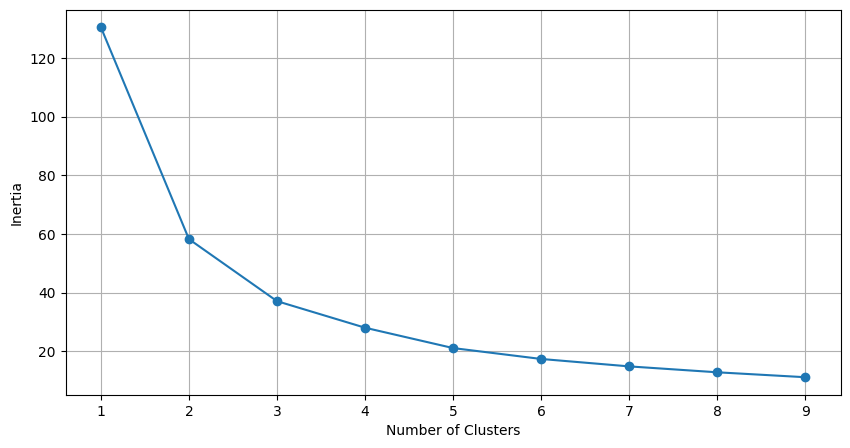

In [20]:
optimise_k_means(iris_data[['sepal length (cm)','sepal width (cm)']],10)

Antal kluster: 2, Antal datapunkter tillhörande kluster:[67 83]
Silhouette Score: 0.4629549773635977


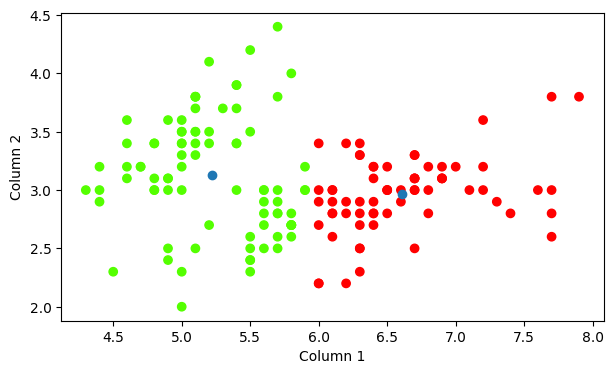

In [21]:
column1 = 'sepal length (cm)'
column2 = 'sepal width (cm)'
max_iter=10
kmeans = KMeans(n_clusters=2, max_iter=max_iter,n_init=100)
kmeans.fit(iris_data[[column1,column2]].to_numpy())

labels = kmeans.predict(iris_data[[column1,column2]].to_numpy())

cluster_count = np.bincount(labels)

kmeans_center = kmeans.cluster_centers_
plt.scatter(iris_data[column1],iris_data[column2],c=labels, cmap='prism')
plt.scatter(kmeans_center[:,0],kmeans_center[:,1])
plt.xlabel("Column 1")
plt.ylabel("Column 2")
print(f"Antal kluster: {kmeans.n_clusters}, Antal datapunkter tillhörande kluster:{cluster_count}")

score = silhouette_score(iris_data[[column1,column2]], kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {score}")

Petal Length och Sepal Width

/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The de

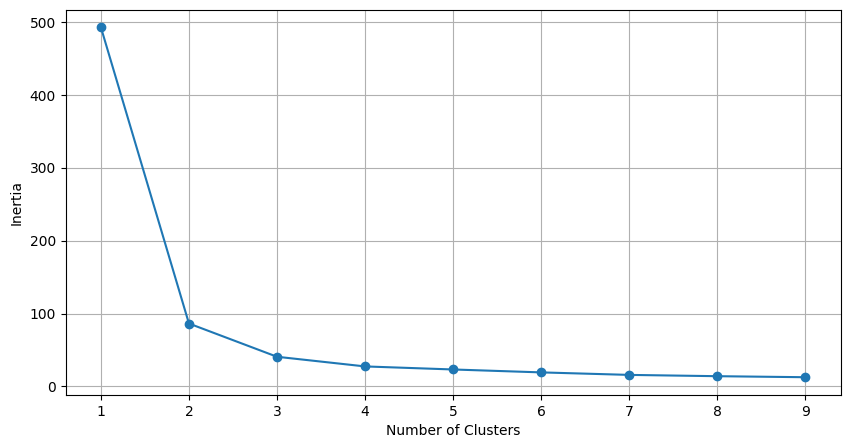

In [22]:
optimise_k_means(iris_data[['petal length (cm)','sepal width (cm)']],10)

Antal kluster: 2, Antal datapunkter tillhörande kluster:[99 51]
Silhouette Score: 0.7392862954658628


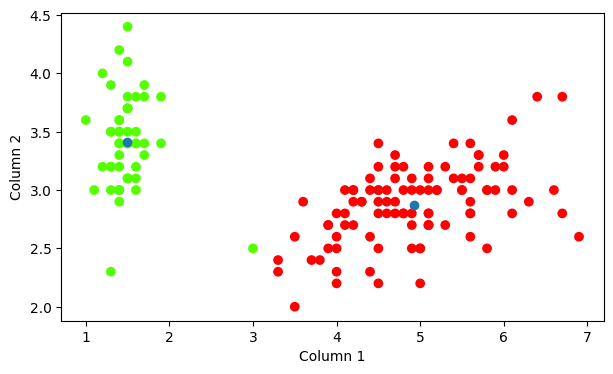

In [23]:
column1 = 'petal length (cm)'
column2 = 'sepal width (cm)'
max_iter = 10
kmeans = KMeans(n_clusters=2, max_iter=max_iter,n_init=100)
kmeans.fit(iris_data[[column1,column2]].to_numpy())

labels = kmeans.predict(iris_data[[column1,column2]].to_numpy())

cluster_count = np.bincount(labels)

kmeans_center = kmeans.cluster_centers_
plt.scatter(iris_data[column1],iris_data[column2],c=labels, cmap='prism')
plt.scatter(kmeans_center[:,0],kmeans_center[:,1])
plt.xlabel("Column 1")
plt.ylabel("Column 2")


print(f"Antal kluster: {kmeans.n_clusters}, Antal datapunkter tillhörande kluster:{cluster_count}")

score = silhouette_score(iris_data[[column1,column2]], kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {score}")

/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The de

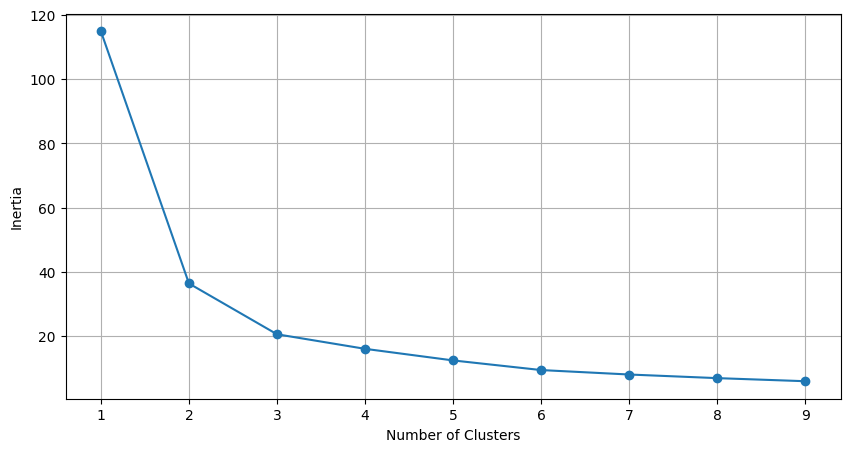

In [24]:
optimise_k_means(iris_data[['petal width (cm)','sepal width (cm)']],10)

Antal kluster: 2, Antal datapunkter tillhörande kluster:[100  50]
Silhouette Score: 0.6273425371868405


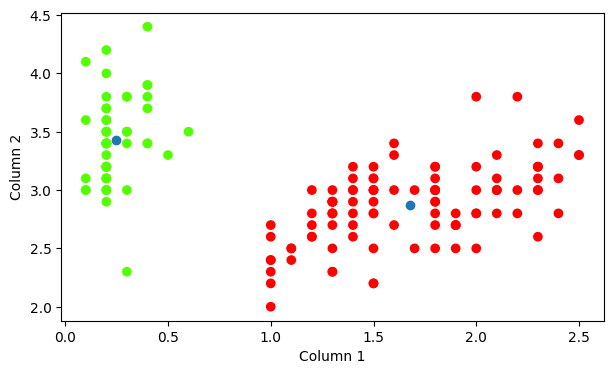

In [25]:
column1 = 'petal width (cm)'
column2 = 'sepal width (cm)'
max_iter = 10
kmeans = KMeans(n_clusters=2, max_iter=max_iter,n_init=100)
kmeans.fit(iris_data[[column1,column2]].to_numpy())

labels = kmeans.predict(iris_data[[column1,column2]].to_numpy())

cluster_count = np.bincount(labels)

kmeans_center = kmeans.cluster_centers_
plt.scatter(iris_data[column1],iris_data[column2],c=labels, cmap='prism')
plt.scatter(kmeans_center[:,0],kmeans_center[:,1])
plt.xlabel("Column 1")
plt.ylabel("Column 2")


print(f"Antal kluster: {kmeans.n_clusters}, Antal datapunkter tillhörande kluster:{cluster_count}")

score = silhouette_score(iris_data[[column1,column2]], kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {score}")

Sepal Length och Petal Length

/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Adam/Documents/jupyter/VS_code/inlämning_2/inlamning_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The de

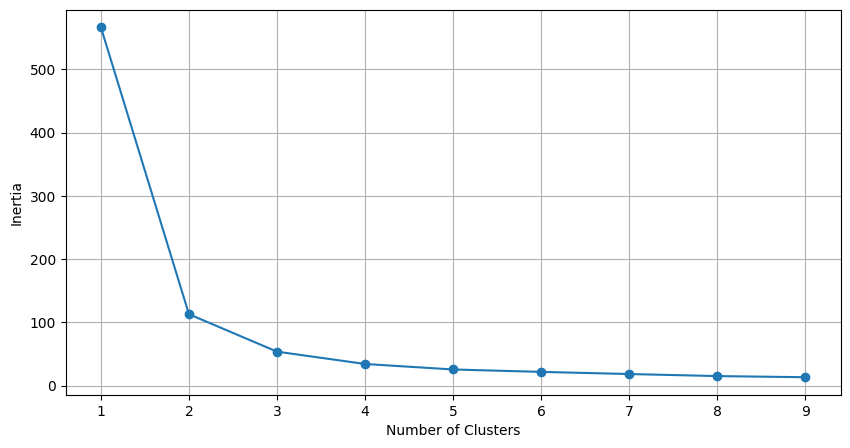

In [26]:
optimise_k_means(iris_data[['sepal length (cm)','petal length (cm)']],10)

Antal kluster: 2, Antal datapunkter tillhörande kluster:[96 54]
Silhouette Score: 0.7097529826994816


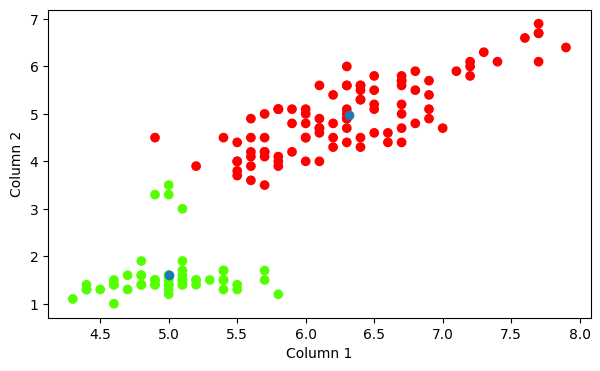

In [27]:
column1 = 'sepal length (cm)'
column2 = 'petal length (cm)'
max_iter = 5
kmeans = KMeans(n_clusters=2, max_iter=max_iter,n_init=100)
kmeans.fit(iris_data[[column1,column2]].to_numpy())

labels = kmeans.predict(iris_data[[column1,column2]].to_numpy())

cluster_count = np.bincount(labels)

kmeans_center = kmeans.cluster_centers_
plt.scatter(iris_data[column1],iris_data[column2],c=labels, cmap='prism')
plt.scatter(kmeans_center[:,0],kmeans_center[:,1])
plt.xlabel("Column 1")
plt.ylabel("Column 2")


print(f"Antal kluster: {kmeans.n_clusters}, Antal datapunkter tillhörande kluster:{cluster_count}")

score = silhouette_score(iris_data[[column1,column2]], kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {score}")